In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("E:/GitHub/CysclisticGrowthAnalysis/data_working/cyclistic_cleaned.csv")


                 count       mean     median          max       std
member_casual                                                      
casual          515022  21.346492  11.816667  1439.833333  44.87097
member         1176086  11.983986   8.316667  1437.766667  23.53154


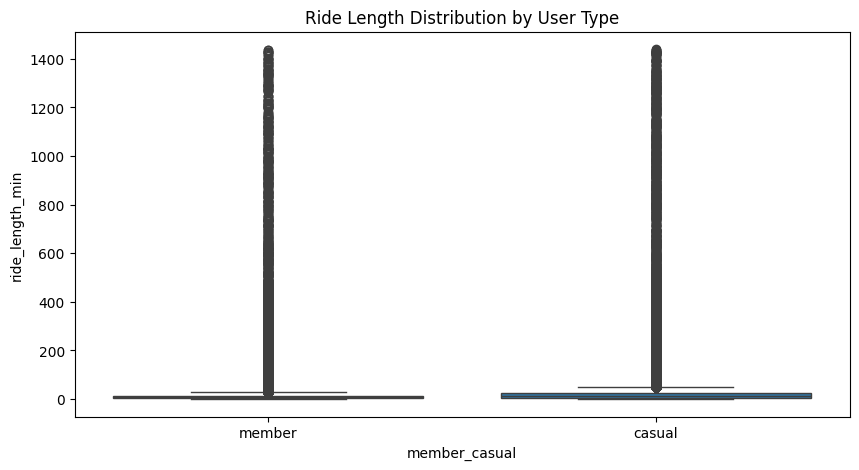

In [5]:
summary = df.groupby('member_casual')['ride_length_min'].agg(['count','mean','median','max','std'])
print(summary)

plt.figure(figsize=(10,5))
sns.boxplot(x='member_casual', y='ride_length_min', data=df)
plt.title("Ride Length Distribution by User Type")
plt.savefig("E:/GitHub/CysclisticGrowthAnalysis/outputs/box_ride_length.png", dpi=150)
plt.show()

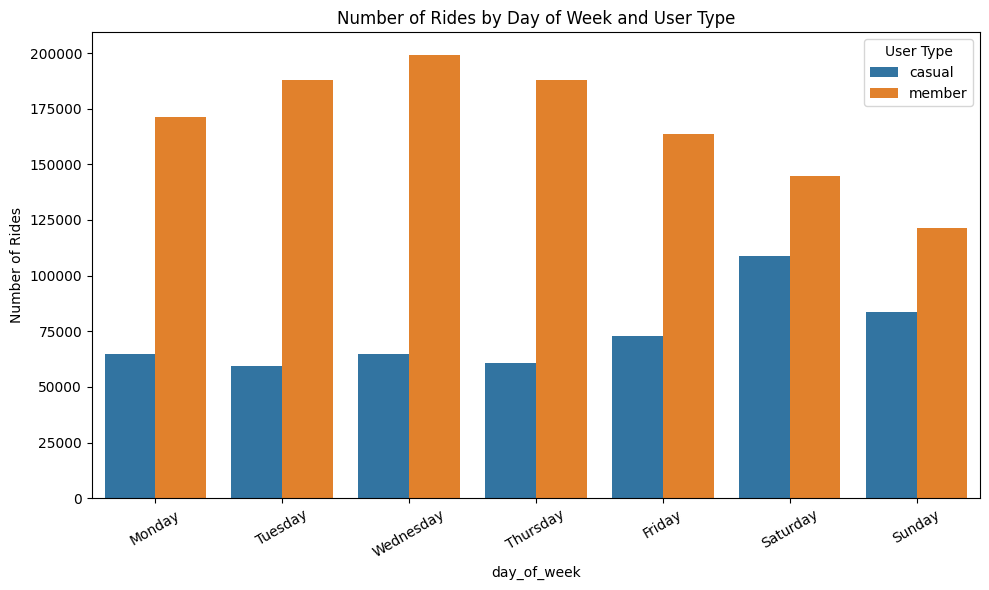

In [15]:
# Ensure day_of_week has proper order
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=days_order, ordered=True)

day_usage = df.groupby(
    ['day_of_week', 'member_casual'],
    observed=True  # Only include categories that appear in data
)['ride_length_min'].count().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=day_usage, x='day_of_week', y='ride_length_min', hue='member_casual')
plt.title("Number of Rides by Day of Week and User Type")
plt.ylabel("Number of Rides")
plt.xticks(rotation=30)
plt.legend(title="User Type")
plt.tight_layout()
plt.savefig("E:/GitHub/CysclisticGrowthAnalysis/outputs/rides_by_day.png", dpi=150)
plt.show()


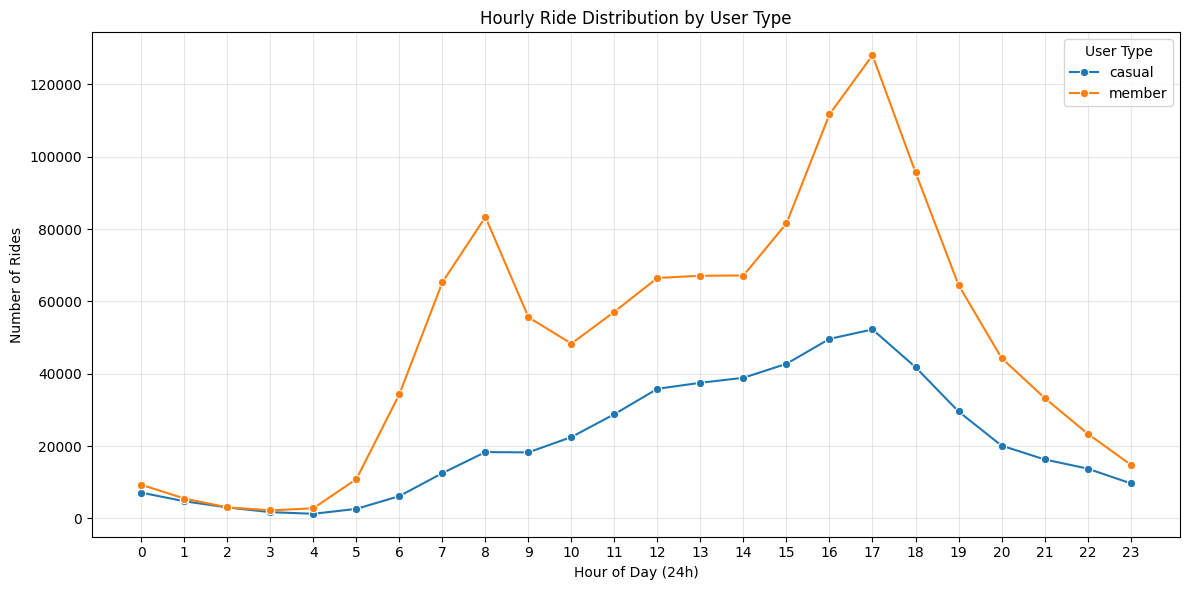

In [10]:
# Count rides per hour for each user type
hour_usage = df.groupby(['hour', 'member_casual'])['ride_length_min'].count().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=hour_usage, x='hour', y='ride_length_min', hue='member_casual', marker='o')
plt.title("Hourly Ride Distribution by User Type")
plt.xlabel("Hour of Day (24h)")
plt.ylabel("Number of Rides")
plt.xticks(range(0,24))
plt.grid(alpha=0.3)
plt.legend(title="User Type")
plt.tight_layout()
plt.savefig("E:/GitHub/CysclisticGrowthAnalysis/outputs/rides_by_hour.png", dpi=150)
plt.show()


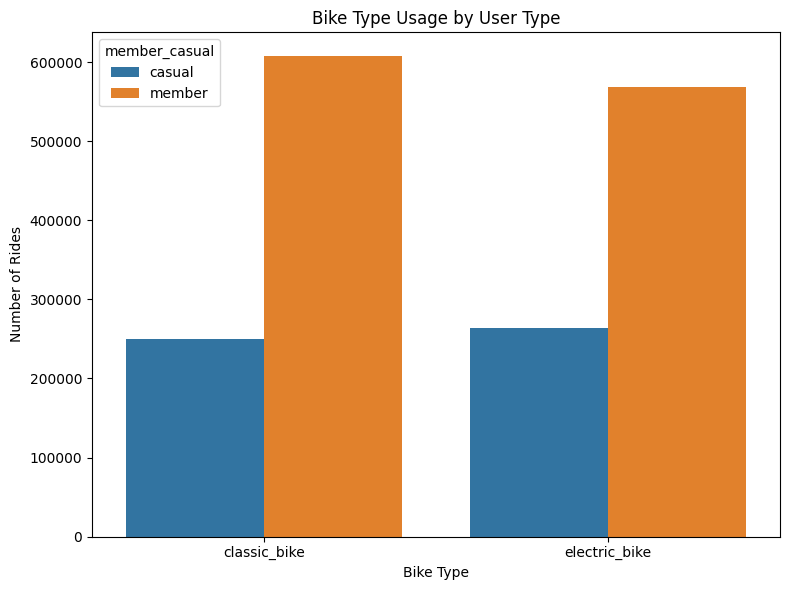

In [11]:
# bike type usage
bike_usage = df.groupby(['rideable_type', 'member_casual'])['ride_length_min'].count().reset_index()

plt.figure(figsize=(8,6))
sns.barplot(data=bike_usage, x='rideable_type', y='ride_length_min', hue='member_casual')
plt.title("Bike Type Usage by User Type")
plt.ylabel("Number of Rides")
plt.xlabel("Bike Type")
plt.tight_layout()
plt.savefig("E:/GitHub/CysclisticGrowthAnalysis/outputs/bike_type_usage.png", dpi=150)
plt.show()


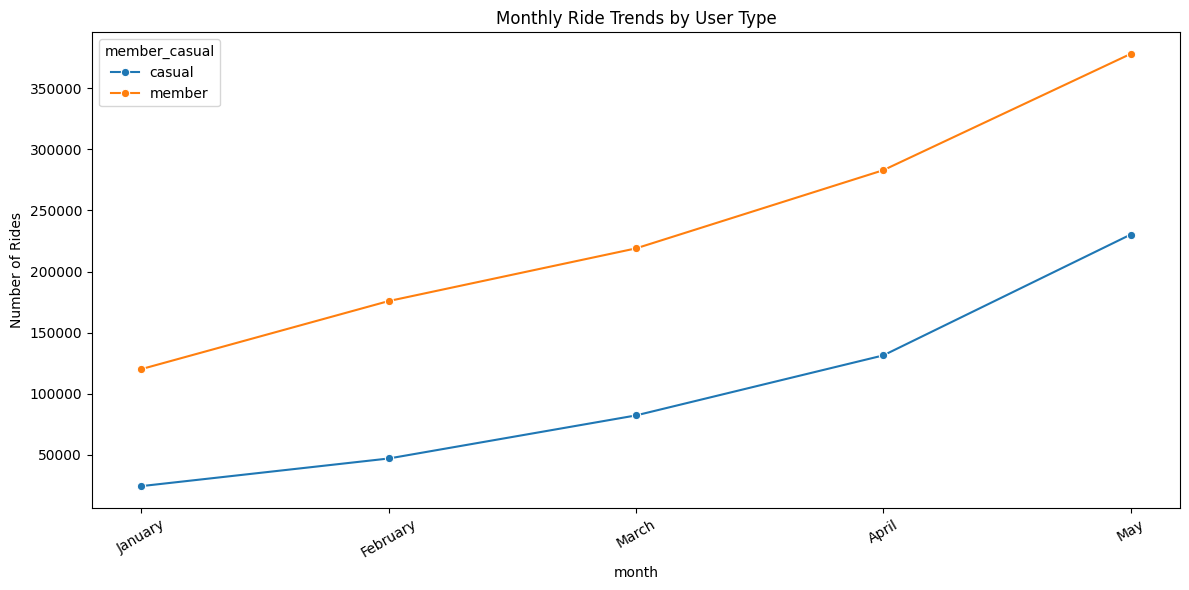

In [14]:
# monthly trends
if 'month' not in df.columns:
    df['month'] = pd.to_datetime(df['started_at']).dt.month_name()

month_order = [
    'January','February','March','April','May','June',
    'July','August','September','October','November','December'
]
df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)
monthly_usage = df.groupby(
    ['month', 'member_casual'],
    observed=True
)['ride_length_min'].count().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_usage, x='month', y='ride_length_min', hue='member_casual', marker='o')
plt.title("Monthly Ride Trends by User Type")
plt.ylabel("Number of Rides")
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig("E:/GitHub/CysclisticGrowthAnalysis/outputs/rides_by_month.png", dpi=150)
plt.show()
